# **Waze Project**
**Course 5 - Regression analysis: Simplify complex data relationships**

# **Course 5 End-of-course project: Regression modeling**

**Part 1:** Model Building and Evaluation

**Part 2:** Interpreting Model Results

<br/>


### Imports and data loading

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


In [89]:
df = pd.read_csv('dataset_encoded_features.csv')

### Explore data with EDA

I loaded the dataset that I had cleaned at step 1 of this project



In [90]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'ID'])

In [91]:
df.head()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,drives_per_driving_day,total_sessions_per_day,km_per_drive,is_churned,device_Android,device_iPhone
0,243,200,296.748273,2276,208,0,2628.845068,1985.775061,28,19,138.360267,0.95,10.526316,0.130381,13.144225,0,1,0
1,133,107,326.896596,1225,19,64,8898.716275,3160.472914,13,11,1246.901868,0.41,9.727273,0.266854,83.165573,0,0,1
2,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,382.393602,0.84,11.875000,0.051121,32.201567,0,1,0
3,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,304.530374,0.72,13.333333,4.505948,22.839778,0,0,1
4,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,219.455667,0.50,3.777778,0.107713,58.091206,0,1,0


### **Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, you can assume that observations are independent for this project.

The second assumption has already been addressed.

The last assumption will be verified after modeling.

**Note:** In practice, modeling assumptions are often violated, and depending on the specifics of your use case and the severity of the violation, it might not affect your model much at all or it will result in a failed model.

#### **Collinearity**

In [92]:
df.corr(method='pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_last_month,drives_per_driving_day,total_sessions_per_day,km_per_drive,is_churned,device_Android,device_iPhone
sessions,1.000000,0.996718,0.581914,0.009293,0.004584,0.005841,0.032414,0.019081,0.083948,0.079605,-0.104231,0.587364,0.488406,0.083261,-0.526354,0.005582,-0.013389,0.013389
drives,0.996718,1.000000,0.579833,0.009020,0.003757,0.007782,0.033332,0.020075,0.083186,0.078961,-0.103552,0.587086,0.491093,0.082236,-0.530187,0.006536,-0.012331,0.012331
total_sessions,0.581914,0.579833,1.000000,0.006679,0.001876,0.004903,0.018300,0.014260,0.046960,0.044423,-0.062794,-0.170897,0.281247,0.158681,-0.293205,0.010670,-0.013174,0.013174
n_days_after_onboarding,0.009293,0.009020,0.006679,1.000000,-0.001728,-0.007997,-0.003183,-0.012337,-0.009055,-0.007888,0.014430,-0.001062,0.002397,-0.308553,0.004123,-0.136070,0.011439,-0.011439
total_navigations_fav1,0.004584,0.003757,0.001876,-0.001728,1.000000,0.000414,-0.007263,0.005060,0.009446,0.007500,0.006124,0.012891,0.010045,0.001705,-0.017898,0.056142,0.000019,-0.000019
total_navigations_fav2,0.005841,0.007782,0.004903,-0.007997,0.000414,1.000000,0.005235,-0.004761,-0.007513,-0.000343,0.013784,-0.000341,0.011827,0.002709,-0.001092,0.016460,-0.000060,0.000060
driven_km_drives,0.032414,0.033332,0.018300,-0.003183,-0.007263,0.005235,1.000000,0.691025,-0.007224,-0.009516,0.363992,0.030578,0.032691,0.020167,0.306486,0.018541,0.001948,-0.001948
duration_minutes_drives,0.019081,0.020075,0.014260,-0.012337,0.005060,-0.004761,0.691025,1.000000,-0.008742,-0.010695,0.255296,0.017545,0.023905,0.014668,0.212067,0.042573,0.009413,-0.009413
activity_days,0.083948,0.083186,0.046960,-0.009055,0.009446,-0.007513,-0.007224,-0.008742,1.000000,0.945184,-0.369636,0.050049,-0.349750,0.001324,-0.043833,-0.300283,0.009377,-0.009377
driving_days,0.079605,0.078961,0.044423,-0.007888,0.007500,-0.000343,-0.009516,-0.010695,0.945184,1.000000,-0.380466,0.046292,-0.365516,0.004535,-0.041757,-0.290374,0.003258,-0.003258


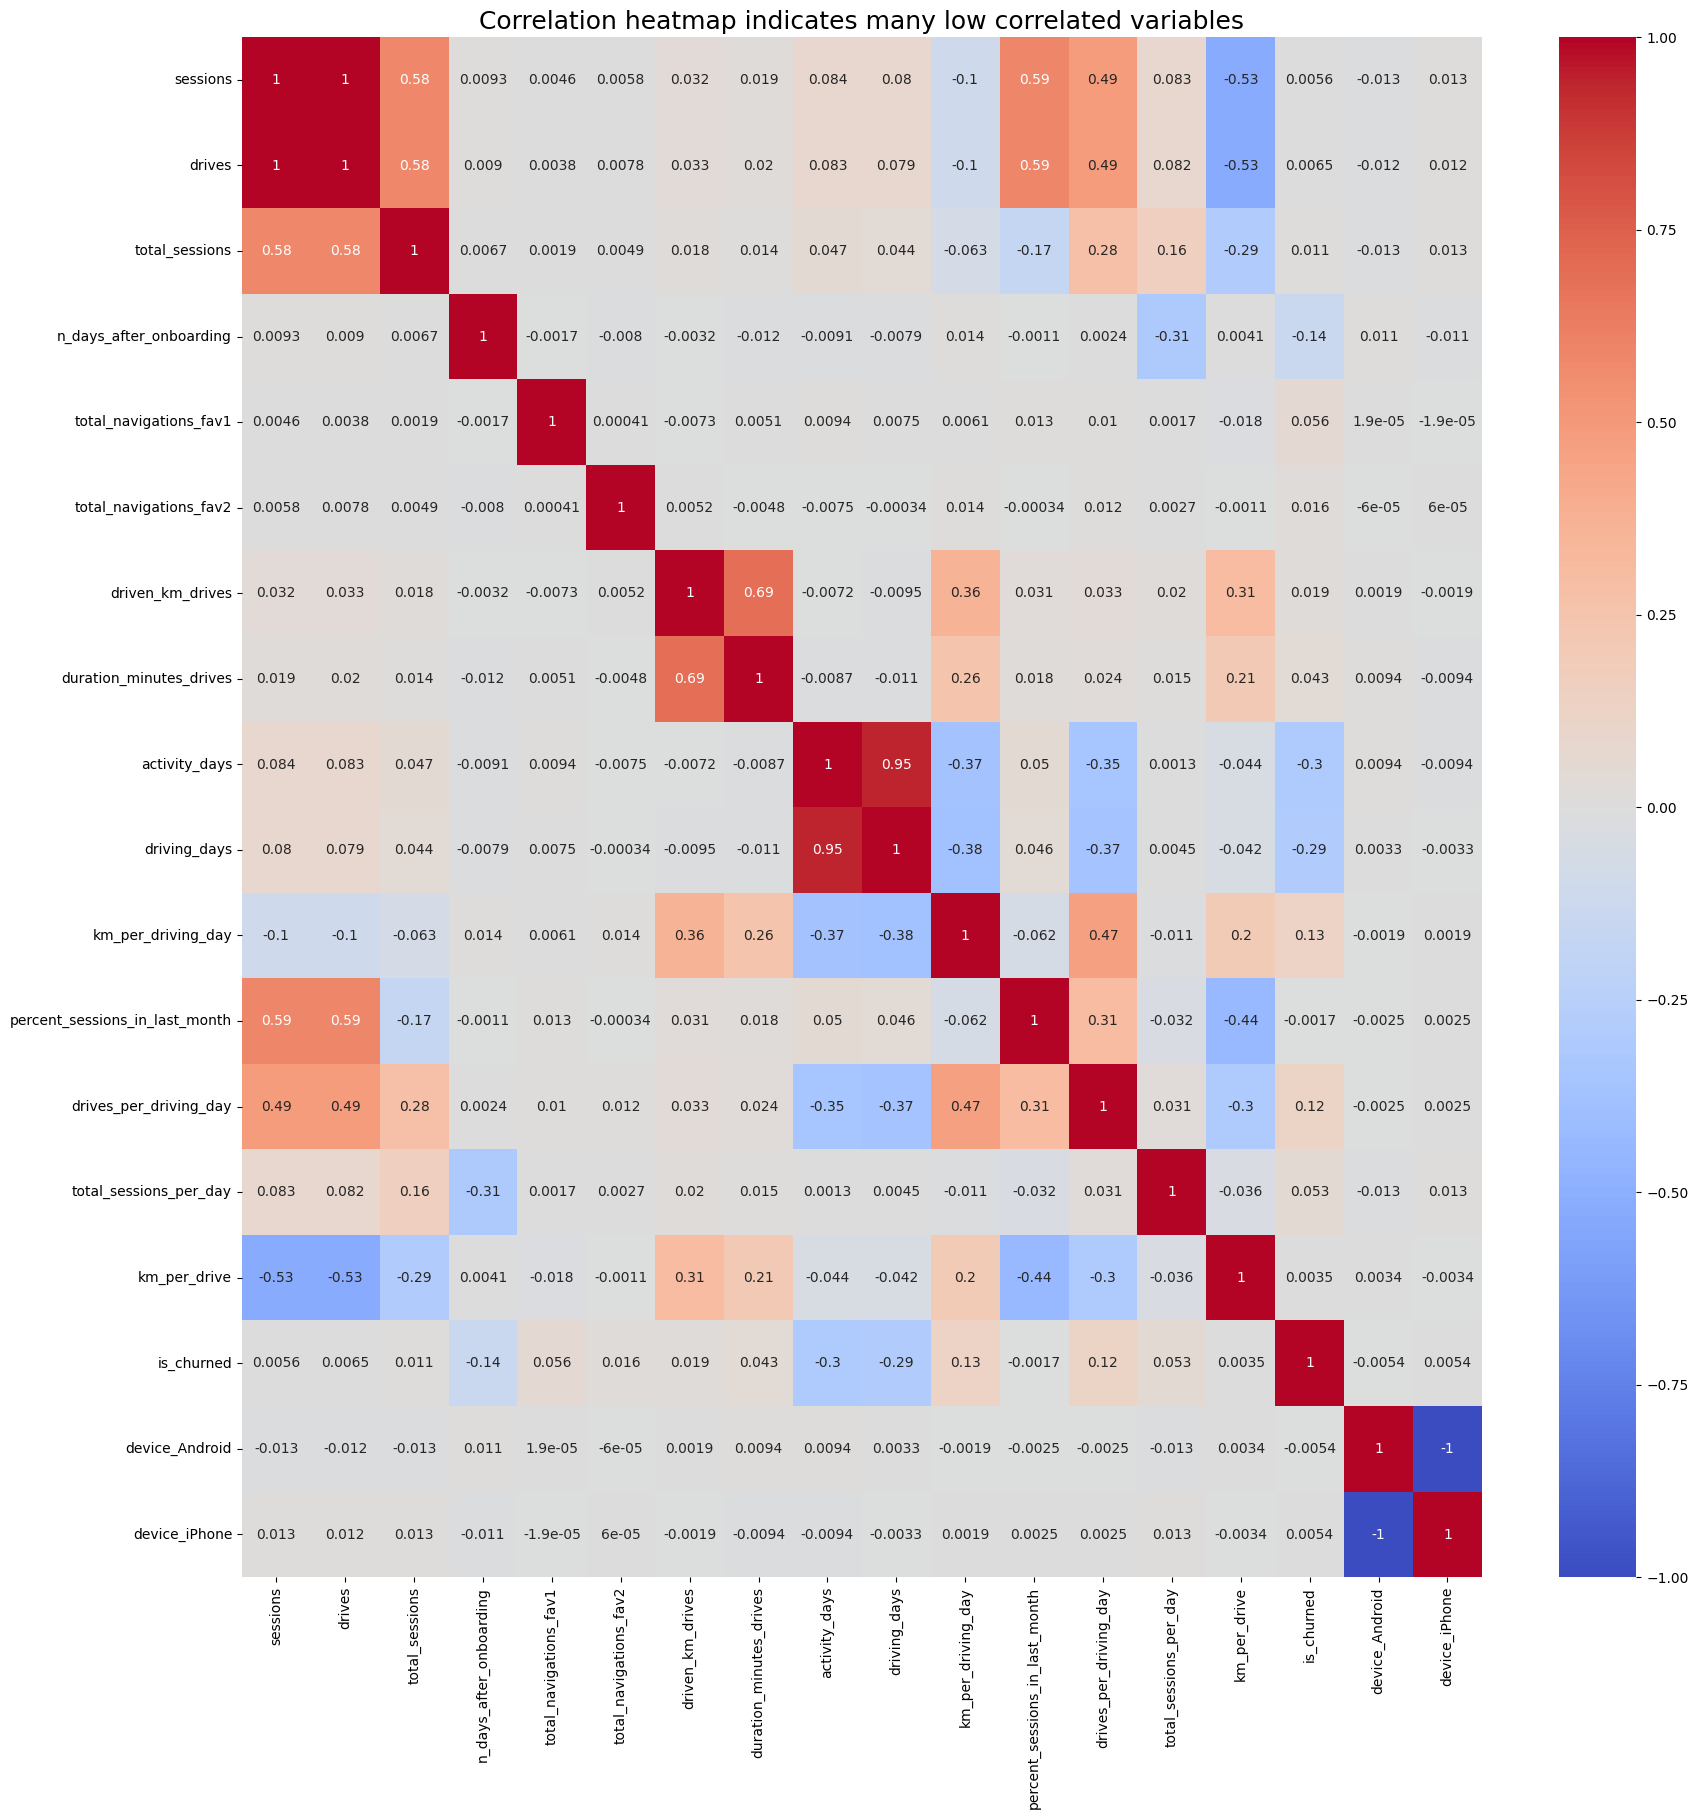

In [93]:
# Plot correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

**Question:** Which variables are multicollinear with each other?

> * `sessions` and `drives`: 1.0*
<br>
> * `driving_days` and `activity_days`: 0.95*
> * also iphone and android

### **Model building**

#### **Assign predictor variables and target**


Let's first drop the following variables:

* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)
* maybe `drives` too? We have this signal in other features?

In [94]:
X = df.drop(columns = ['sessions', 'driving_days', 'device_Android', 'device_iPhone', 'is_churned'])
y = df['is_churned']

#### **Split the data**

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [96]:
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,km_per_driving_day,percent_sessions_in_last_month,drives_per_driving_day,total_sessions_per_day,km_per_drive
1385,76,214.922107,2432,185,0,705.063644,519.956130,21,39.170202,0.40,4.222222,0.088373,9.277153
11422,42,68.272474,1244,27,86,2097.194419,529.938999,10,209.719442,0.76,4.200000,0.054881,49.933200
789,55,97.056388,688,130,47,6720.288699,2160.651974,27,258.472642,0.67,2.115385,0.141070,122.187067
2658,14,91.741331,86,110,0,3676.448632,2573.937384,4,0.000000,0.16,0.000000,1.066760,262.603474
5510,70,169.130689,2624,471,0,3998.644253,2330.647134,2,1999.322126,0.52,35.000000,0.064455,57.123489


In [97]:
model = LogisticRegression(penalty=None, max_iter=10000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=10000, penalty=None)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  Remember that the coefficients represent the change in the **log odds** of the target variable for **every one unit increase in X**.

If you want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [98]:
pd.Series(model.coef_[0], index=X.columns)

drives                            0.001905
total_sessions                    0.000357
n_days_after_onboarding          -0.000423
total_navigations_fav1            0.001169
total_navigations_fav2            0.000618
driven_km_drives                 -0.000039
duration_minutes_drives           0.000131
activity_days                    -0.102966
km_per_driving_day                0.000081
percent_sessions_in_last_month    0.033675
drives_per_driving_day           -0.005137
total_sessions_per_day           -0.007965
km_per_drive                     -0.000046
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [99]:
model.intercept_

array([0.04151547])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [100]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.93574086, 0.06425914],
       [0.78929501, 0.21070499],
       [0.93497997, 0.06502003],
       ...,
       [0.94292426, 0.05707574],
       [0.67425624, 0.32574376],
       [0.55526655, 0.44473345]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [101]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

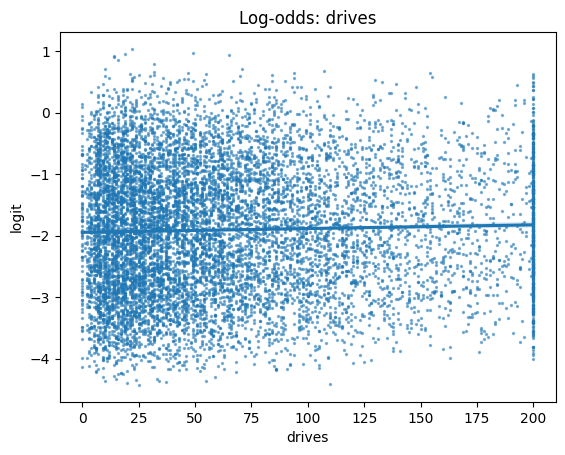

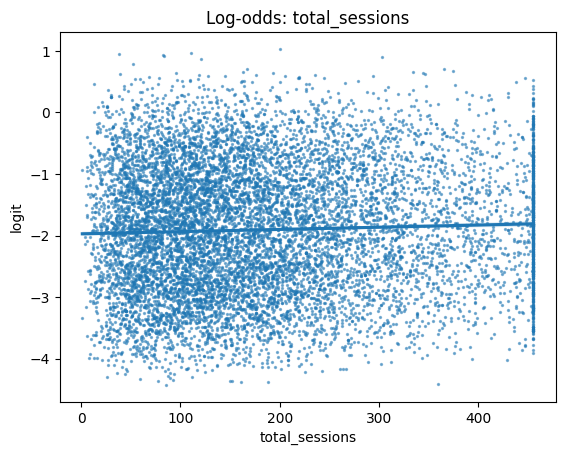

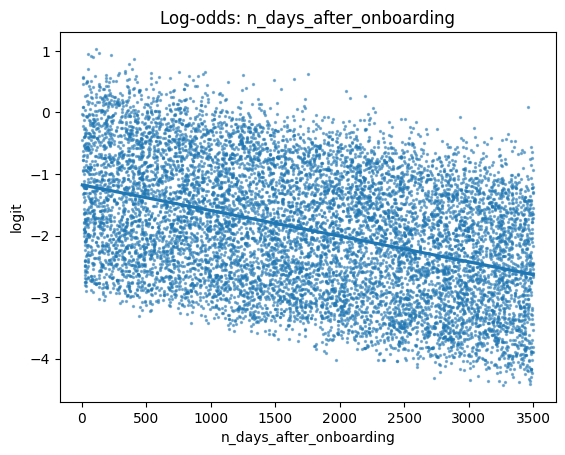

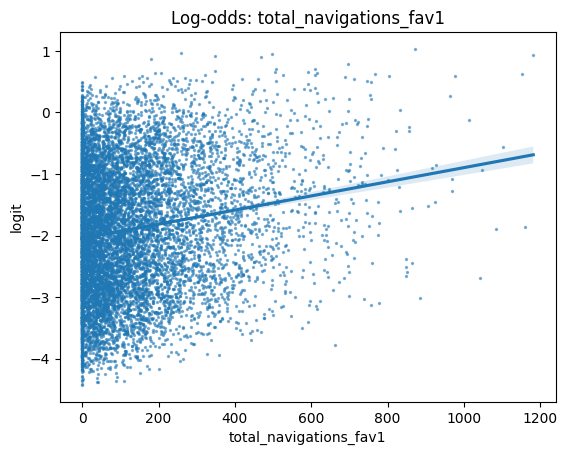

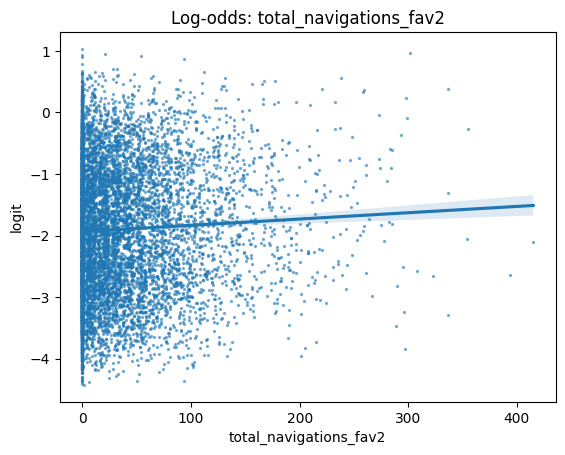

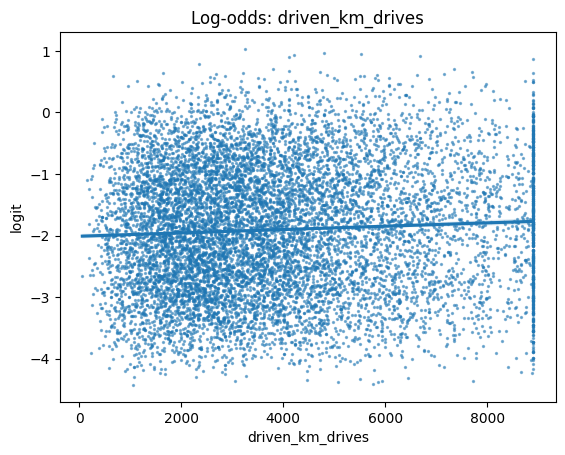

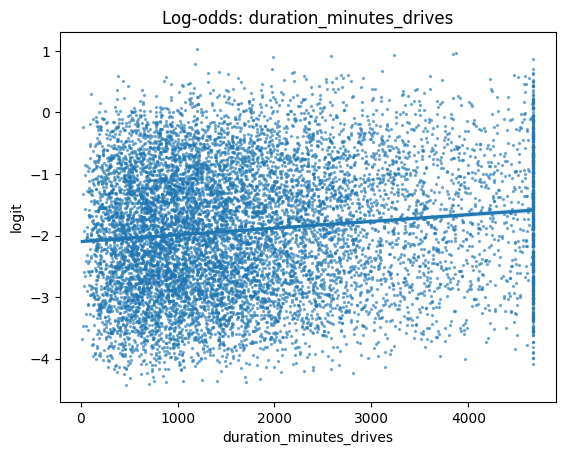

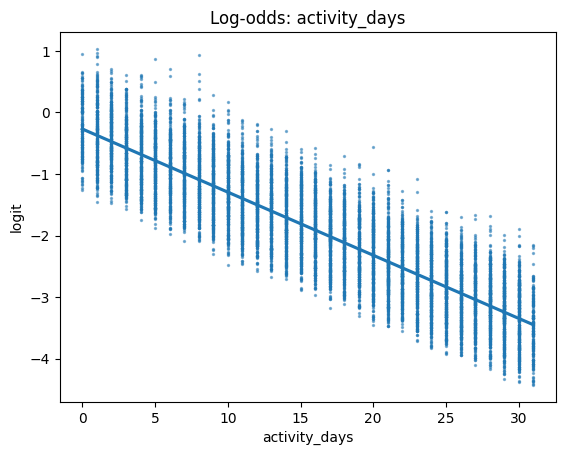

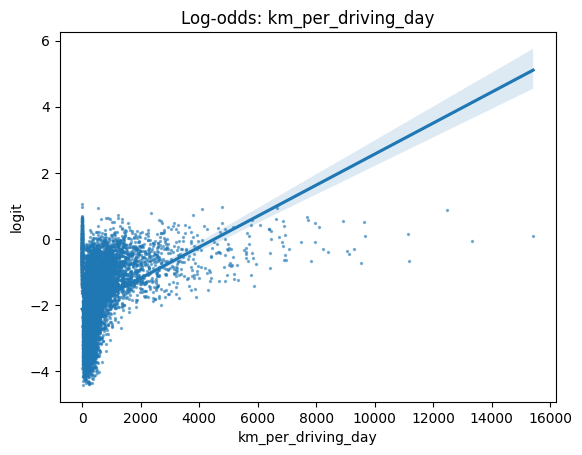

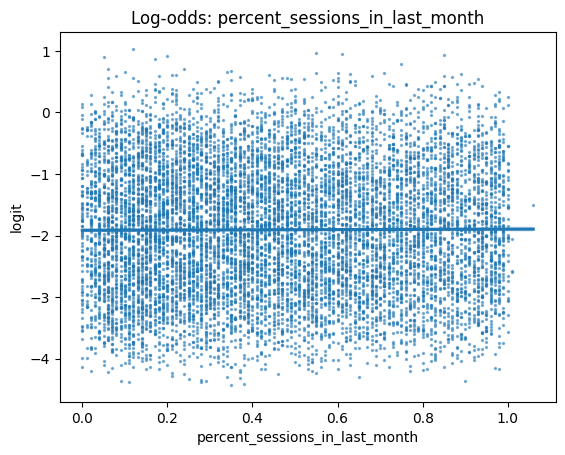

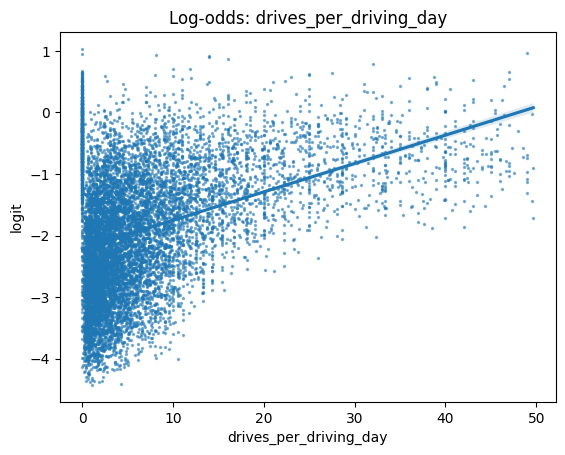

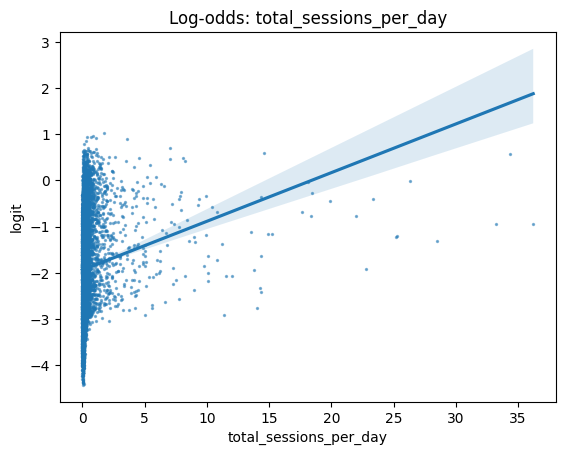

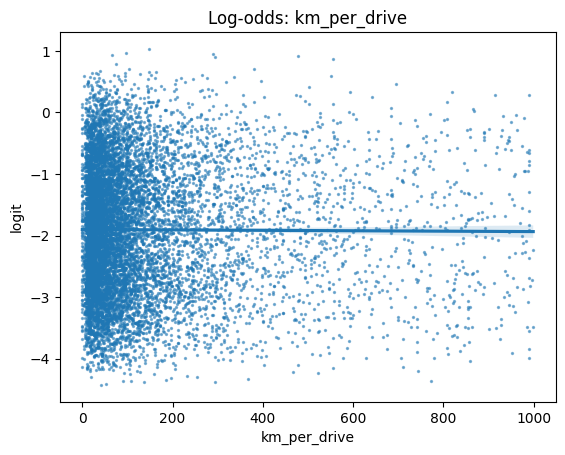

In [102]:
for col in X.columns:
    fig = sns.regplot(x=col, y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
    plt.title(f'Log-odds: {col}')
    plt.show()

##### Seems like most of the engineered features (as well as some original ones, such as navigations to favourite places) do not meet the linearity assumption. Let's remove them and try again

### Refitting the model after checking linearity assumption

In [74]:
X = df[['drives', 'activity_days', 'total_sessions', 'n_days_after_onboarding', 
        'driven_km_drives', 'duration_minutes_drives', 'percent_sessions_in_last_month', ]]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty=None)

In [75]:
pd.Series(model.coef_[0], index=X.columns)

drives                            0.001060
activity_days                    -0.103132
total_sessions                    0.000434
n_days_after_onboarding          -0.000416
driven_km_drives                 -0.000028
km_per_drive                      0.000006
duration_minutes_drives           0.000133
percent_sessions_in_last_month    0.088743
dtype: float64

In [79]:
model.intercept_

array([0.1639427])

### **Results and evaluation**

If the logistic assumptions are met, the model results can be appropriately interpreted.


In [80]:
y_preds = model.predict(X_test)

In [81]:
model.score(X_test, y_test)

0.8299319727891157

### **Show results with a confusion matrix**

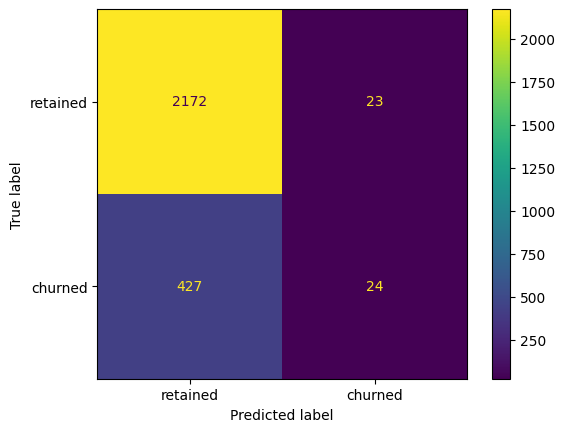

In [84]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot()

In [85]:
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.84      0.99      0.91      2195
     churned       0.51      0.05      0.10       451

    accuracy                           0.83      2646
   macro avg       0.67      0.52      0.50      2646
weighted avg       0.78      0.83      0.77      2646



The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

### **BONUS**

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [86]:
feature_importance = list(zip(X_train.columns, model.coef_[0]))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

Text(0.5, 1.0, 'Feature importance')

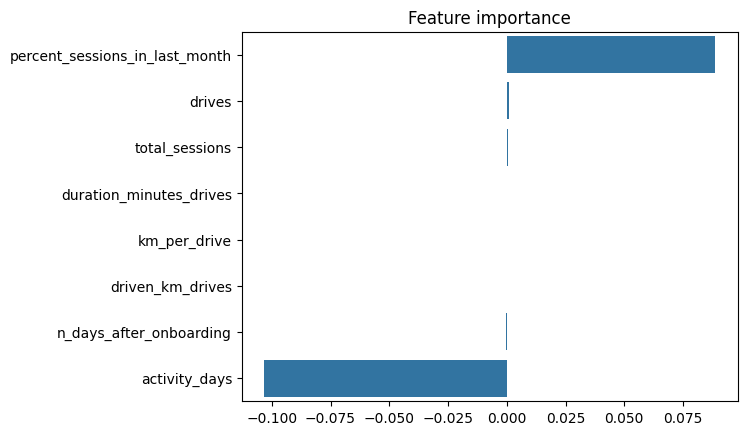

In [88]:
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance')

### **Conclusion**

This model demonstrated low performance and should not be chosen for production. Still, it could be used to guide further exploratory efforts.

In terms of features, `activity_days` was by far the most important one in this model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn. Also, it may be even one of the values that defines the label "churned", since we are given no precised instructions on how the company assigns this label.

It would also help to address the issues in the data discussed in the previous part of the project, and get some more granular data on each user. 